# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1.  Forward pass
2.  Calculate the loss
3.       Zero gradients
4.  Perform backpropagation on the loss
5.  Update the optimizer (gradient descent)


In [16]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

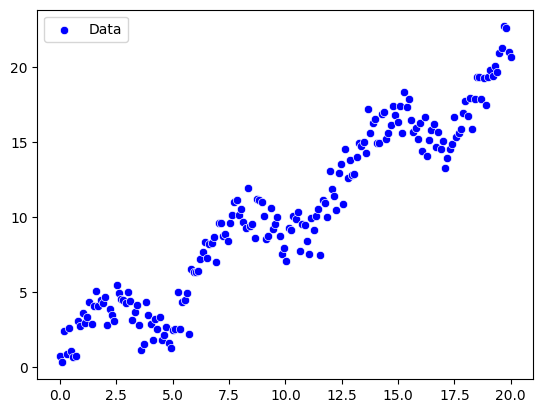

In [17]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [18]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [19]:
df = Simple1DRegressionDataset(X,y)


In [20]:
df[0]


(tensor([0.]), tensor([0.6939]))

In [21]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [22]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[11.1213]])]

In [23]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel,self).__init__()
        self.l1 = nn.Linear(1,16)
        self.l2 = nn.Linear(16,32)
        self.l3 = nn.Linear(32,1)
        self.activation = nn.ReLU()

    def forward(self,x):
        x = self.l1(x)
        x = self.activation(x)
        x = self.l2(x)
        x = self.activation(x)
        x = self.l3(x)
        return x

model_2 = LinearModel()


In [24]:
loss_fn = nn.MSELoss()

In [25]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.001)

In [26]:
# so we need now a training loop
import torch.optim.adam
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=15,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
        if epoch%20 == 0:
            print(f'Epoch {epoch}, loss: {running_loss/len(training_loader)}')



In [27]:
device = 'cpu' if torch.mps.is_available() else 'cpu'
device

'cpu'

In [28]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=500
                )


Batches: 100%|██████████| 200/200 [00:00<00:00, 4555.61it/s]


Epoch 0, loss: 9.745307098995399


Epochs:   4%|▍         | 21/500 [00:00<00:19, 24.79it/s]

Epoch 20, loss: 5.964010970250165


Epochs:   8%|▊         | 41/500 [00:01<00:22, 20.53it/s]

Epoch 40, loss: 5.327739402434381


Batches: 100%|██████████| 200/200 [00:00<00:00, 5038.38it/s]


Epoch 60, loss: 5.084771596882165


Batches: 100%|██████████| 200/200 [00:00<00:00, 5111.58it/s]


Epoch 80, loss: 4.811468224022764


Epochs:  20%|██        | 101/500 [00:04<00:17, 23.15it/s]

Epoch 100, loss: 4.5696098901362525


Batches: 100%|██████████| 200/200 [00:00<00:00, 5133.19it/s]


Epoch 120, loss: 3.8003058396048437


Batches: 100%|██████████| 200/200 [00:00<00:00, 4908.58it/s]


Epoch 140, loss: 4.116472694280674


Epochs:  32%|███▏      | 161/500 [00:06<00:14, 24.05it/s]

Epoch 160, loss: 3.579289428752254


Batches: 100%|██████████| 200/200 [00:00<00:00, 5129.11it/s]


Epoch 180, loss: 3.5962648108213036


Batches: 100%|██████████| 200/200 [00:00<00:00, 5059.87it/s]


Epoch 200, loss: 3.1735102689885935


Epochs:  44%|████▍     | 221/500 [00:09<00:11, 23.83it/s]

Epoch 220, loss: 3.5361560469170468


Batches: 100%|██████████| 200/200 [00:00<00:00, 5099.46it/s]


Epoch 240, loss: 3.3101773032116673


Batches: 100%|██████████| 200/200 [00:00<00:00, 5061.86it/s]


Epoch 260, loss: 3.4309604443031274


Epochs:  56%|█████▌    | 281/500 [00:11<00:09, 24.20it/s]

Epoch 280, loss: 3.3453428096909192


Batches: 100%|██████████| 200/200 [00:00<00:00, 4823.45it/s]


Epoch 300, loss: 3.2548185600816213


Batches: 100%|██████████| 200/200 [00:00<00:00, 4701.45it/s]


Epoch 320, loss: 3.506300777772667


Epochs:  68%|██████▊   | 341/500 [00:14<00:06, 24.35it/s]

Epoch 340, loss: 3.3464149700509007


Batches: 100%|██████████| 200/200 [00:00<00:00, 4949.29it/s]


Epoch 360, loss: 3.3541826349488293


Batches: 100%|██████████| 200/200 [00:00<00:00, 5050.67it/s]


Epoch 380, loss: 3.354620150968549


Epochs:  80%|████████  | 401/500 [00:17<00:04, 23.02it/s]

Epoch 400, loss: 2.7653214084153297


Batches: 100%|██████████| 200/200 [00:00<00:00, 4985.41it/s]


Epoch 420, loss: 2.9676355204591807


Batches: 100%|██████████| 200/200 [00:00<00:00, 4953.41it/s]


Epoch 440, loss: 3.1021070268372024


Epochs:  92%|█████████▏| 461/500 [00:19<00:01, 23.79it/s]

Epoch 460, loss: 3.0871645998339954


Batches: 100%|██████████| 200/200 [00:00<00:00, 5161.01it/s]


Epoch 480, loss: 3.455836970903838


Epochs: 100%|██████████| 500/500 [00:21<00:00, 23.52it/s]


In [29]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

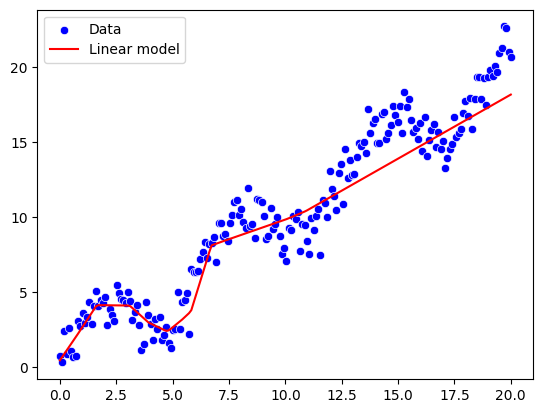

In [30]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
